# Experiment Data Master
## Qi 2017 Project
## August 2021 - Maria Micaela Ninni

## Library Import

In [34]:
from nptdms import TdmsFile
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import numpy as np
from scipy.stats import linregress
import random

## Opening JSON Files

In [35]:
# EMS Data
col_EMS = ['Experiment Number', 'Date', 'Target Temperature', 'Grain Size', 
    'Target Strain Rate', 'Initial Length', 'Final Length', 'Target Pressure', 
    'Internal Axial Load Read', 'Storage', 'Exp Start', 'Exp Finish','Regime','Operator']
exp_EMS = pd.read_csv (r'D:\ICE\Qi2017\EMS.csv', names = col_EMS, skiprows=1)
experiment_number = pd.Series(exp_EMS['Experiment Number'])

#print(experiment_number)

final_data = {} 
for i in experiment_number:
    with open(f'D:\ICE\EMS\PIL{i}.json') as json_file:
        data = json.load(json_file)

        final_data[i] = {   'stress':data['Stress'],
                            'strain':data['Strain'],
                            'temp':data['Temperature Exp'],
                            'SP':data['Stress Peak'],
                            'SF':data['Stress Flow'],
                            'SRP':data['Strain Rate Peak'],
                            'SRF':data['Strain Rate Flow']}

        print(f'This is Peak Stress for {i}', final_data[i]['SP'], f'This is the Flow Stress for {i}', final_data[i]['SF'])


This is Peak Stress for 19 6.585287499958961 This is the Flow Stress for 19 3.0524763002713766
This is Peak Stress for 20 8.122018983187413 This is the Flow Stress for 20 3.8759621574454233
This is Peak Stress for 21 2.571420349870933 This is the Flow Stress for 21 0.5918085752449503


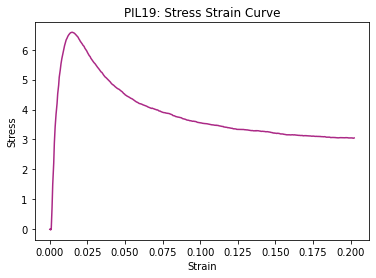

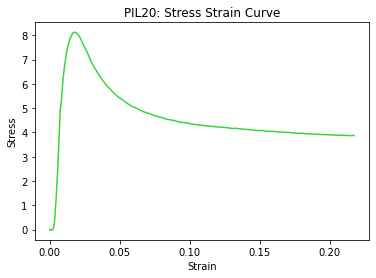

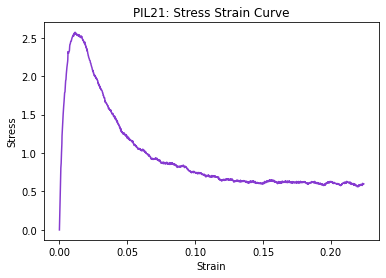

In [36]:
for i in experiment_number:
    
        plt.plot(final_data[i]['strain'], final_data[i]['stress'], color = color)
        plt.xlabel('Strain')
        plt.ylabel('Stress')
        plt.title(f'PIL{i}: Stress Strain Curve')
        plt.show()

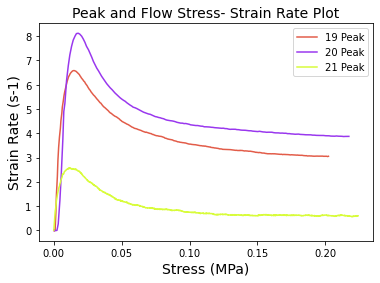

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols= 1)
coarseStress = []
coarseStrain = []
fineStress = []
fineStrain = []
for experiment_number, experiment_data in final_data.items():
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)

        ax.plot(experiment_data['strain'], experiment_data['stress'], color = color, label = f'{experiment_number} Peak')
        ax.legend(loc = 'upper right')

plt.title('Peak and Flow Stress- Strain Rate Plot', fontsize = 14)
plt.xlabel('Stress (MPa)', fontsize = 14)
plt.ylabel('Strain Rate (s-1)', fontsize = 14)


plt.show()

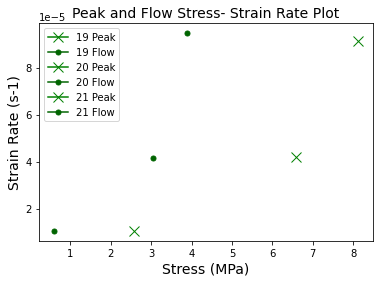

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols= 1)
coarseStress = []
coarseStrain = []
fineStress = []
fineStrain = []
for experiment_number, experiment_data in final_data.items():
        ax.plot(experiment_data['SP'], experiment_data['SRP'], color = 'green', label = f'{experiment_number} Peak', marker='x', markersize=10)
        ax.plot(experiment_data['SF'], experiment_data['SRF'], color = 'darkgreen', label = f'{experiment_number} Flow', marker='.', markersize=10)
        ax.legend(loc = 'upper left')
        fineStress.append(experiment_data['SP'])
        fineStrain.append(experiment_data['SRP'])

plt.title('Peak and Flow Stress- Strain Rate Plot', fontsize = 14)
plt.xlabel('Stress (MPa)', fontsize = 14)
plt.ylabel('Strain Rate (s-1)', fontsize = 14)


plt.show()